In [14]:
import numpy as np
import pandas as pd
import osmnx as ox
import networkx as nx

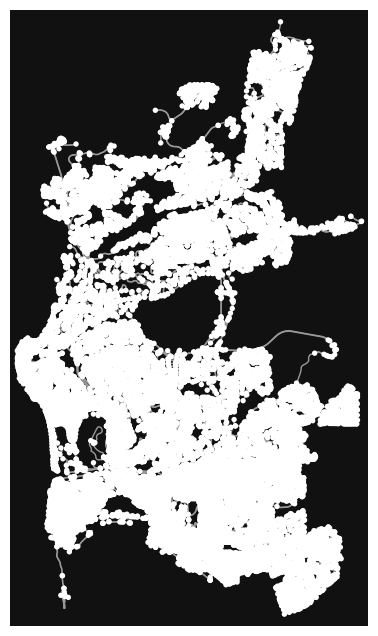

In [74]:
G = ox.graph_from_place("San Diego, California, USA", network_type="drive")

In [87]:

# kazhakootam coordinates
ev_station_lat, ev_station_lon = 32.8410150, -117.2730760
# medical college coordinates
sdge_lat, sdge_lon = 32.82359606106152, -117.14312944370967

# fetch the nearest node w.r.t coordinates
ev_node = ox.distance.nearest_nodes(G, ev_station_lon, ev_station_lat)
sdge_node = ox.distance.nearest_nodes(G,sdge_lon , sdge_lat)

print("ev charger node: {ev_node}, \
sdge node: {sdge_node}".format(
    ev_node=ev_node, sdge_node=sdge_node))

origin = sdge_node
destination = ev_node

route_nodes = ox.routing.shortest_path(G, origin, destination, weight = "length")



ev charger node: 49276846, sdge node: 49547031


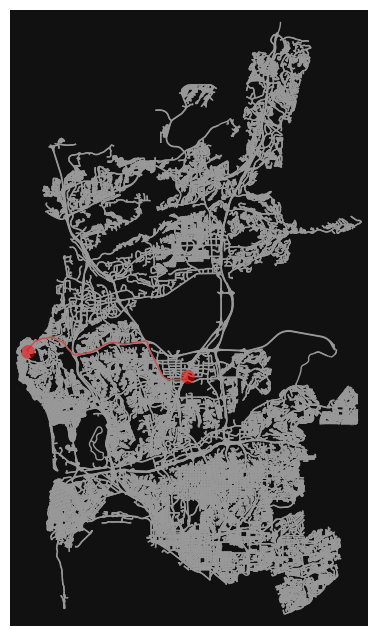

In [85]:
fig, ax = ox.plot_graph_route(G, route_nodes, route_color="r", 
                              route_linewidth=1, node_size=0)

In [100]:
gdf = ox.routing.route_to_gdf(G, route_nodes)
pathlength = np.round((gdf["length"].sum()/1000)/1.609, 2)
print("Path from 7544 Girard Ave EV Charging Station to SDGE HQ is", pathlength, 'miles.')

Path from 7544 Girard Ave EV Charging Station to SDGE HQ is 9.52 miles.


### Other exploration

In [20]:
# save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.save_graph_geopackage(G, filepath="./data/mynetwork.gpkg")
ox.save_graphml(G, filepath="./data/mynetwork.graphml")

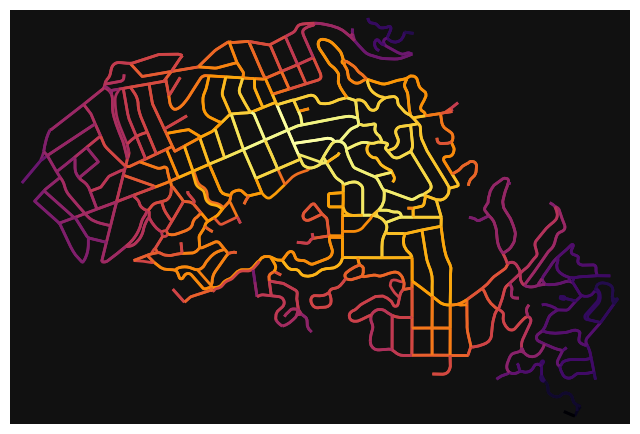

In [21]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

